In [1]:
import pandas as pd 

In [3]:
df=pd.read_csv('C:\\Users\\ASUS\\Desktop\\sales_data.csv')

In [4]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [6]:
df.value_counts()

Product_ID  Sale_Date   Sales_Rep  Region  Sales_Amount  Quantity_Sold  Product_Category  Unit_Cost  Unit_Price  Customer_Type  Discount  Payment_Method  Sales_Channel  Region_and_Sales_Rep
1001        2023-02-18  David      West    7154.95       27             Clothing          939.02     1286.92     Returning      0.07      Credit Card     Retail         West-David              1
1066        2023-07-21  Charlie    East    3492.19       4              Furniture         868.83     1177.75     Returning      0.21      Credit Card     Retail         East-Charlie            1
1064        2023-12-19  Alice      West    106.47        35             Clothing          4900.03    5118.83     Returning      0.07      Credit Card     Retail         West-Alice              1
1065        2023-01-07  Eve        North   2365.87       6              Clothing          2019.90    2116.74     New            0.11      Credit Card     Online         North-Eve               1
            2023-01-27  Bob   

In [7]:
df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [8]:
df.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

In [12]:
df['Order_date']=pd.to_datetime(df['Sale_Date'])
df['Month']=df['Order_date'].dt.month
df['Year']=df['Order_date'].dt.year
monthly_sales=df.groupby(['Year','Month'])['Sales_Amount'].sum().reset_index()

df['Quarter']=df['Order_date'].dt.quarter
quarterly_sales=df.groupby(['Year','Quarter'])['Sales_Amount'].sum().reset_index()
print('Monthly Sales:',monthly_sales)
print('Quarterly sales:',quarterly_sales)

Monthly Sales:     Year  Month  Sales_Amount
0   2023      1     476092.36
1   2023      2     368919.36
2   2023      3     402638.77
3   2023      4     438992.61
4   2023      5     389078.76
5   2023      6     418458.34
6   2023      7     374242.88
7   2023      8     443171.28
8   2023      9     367837.60
9   2023     10     460378.78
10  2023     11     467482.90
11  2023     12     392643.58
12  2024      1      19328.01
Quarterly sales:    Year  Quarter  Sales_Amount
0  2023        1    1247650.49
1  2023        2    1246529.71
2  2023        3    1185251.76
3  2023        4    1320505.26
4  2024        1      19328.01


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 

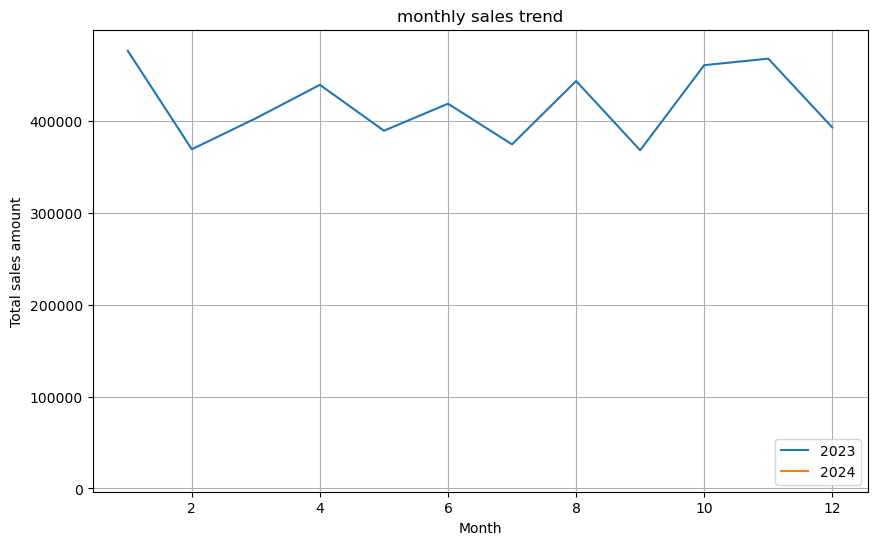

In [14]:
plt.figure(figsize=(10,6))
for year in monthly_sales['Year'].unique():
    plt.plot(monthly_sales[monthly_sales['Year']==year]['Month'],
            monthly_sales[monthly_sales['Year']==year]['Sales_Amount'],
            label=str(year))
plt.xlabel('Month')
plt.ylabel('Total sales amount')
plt.title('monthly sales trend')
plt.legend()
plt.grid(True)
plt.show()

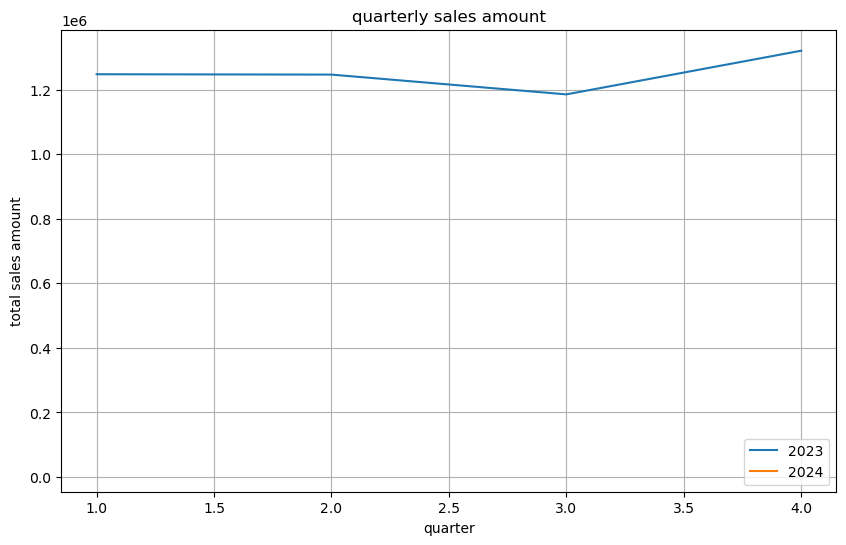

In [17]:
plt.figure(figsize=(10,6))
for year in quarterly_sales['Year'].unique():
    plt.plot(quarterly_sales[quarterly_sales['Year']==year]['Quarter'],
            quarterly_sales[quarterly_sales['Year']==year]['Sales_Amount'],
            label=str(year))
    
plt.xlabel('quarter')
plt.ylabel('total sales amount')
plt.title('quarterly sales amount')
plt.legend()
plt.grid(True)
plt.show()    

In [18]:
region_sales=df.groupby('Region')['Sales_Amount'].sum()
print(region_sales)
highest_sales_region=region_sales.idxmax()
highest_sales_region

Region
East     1259792.93
North    1369612.51
South    1154250.86
West     1235608.93
Name: Sales_Amount, dtype: float64


'North'

               sum         mean    median          std
Region                                                
East    1259792.93  4790.087186  4649.880  2792.336854
North   1369612.51  5129.634869  5207.030  2893.659953
South   1154250.86  5107.304690  4759.875  2852.630702
West    1235608.93  5063.971025  5249.625  2851.413141


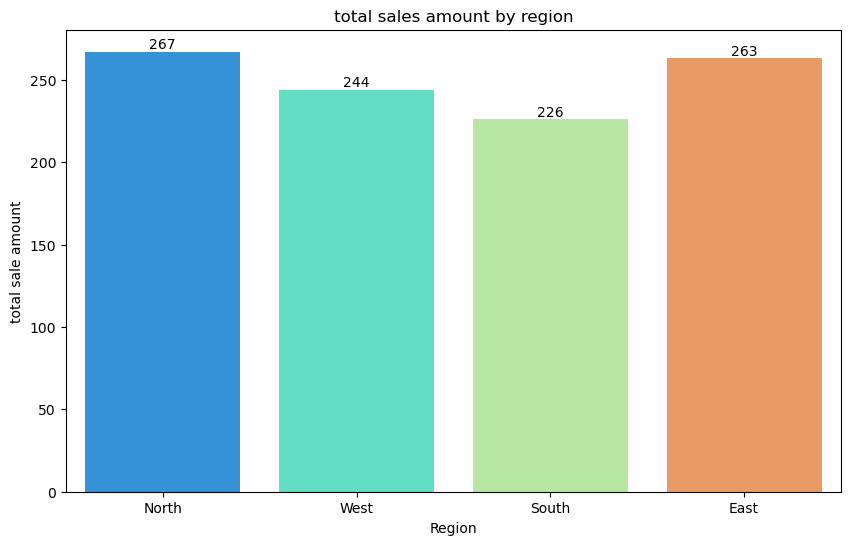

In [20]:
region_sales_stats=df.groupby('Region')['Sales_Amount'].agg(['sum','mean','median','std'])
print(region_sales_stats)
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df,x='Region',palette='rainbow')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Region')
plt.ylabel('total sale amount')
plt.title('total sales amount by region')
plt.show()

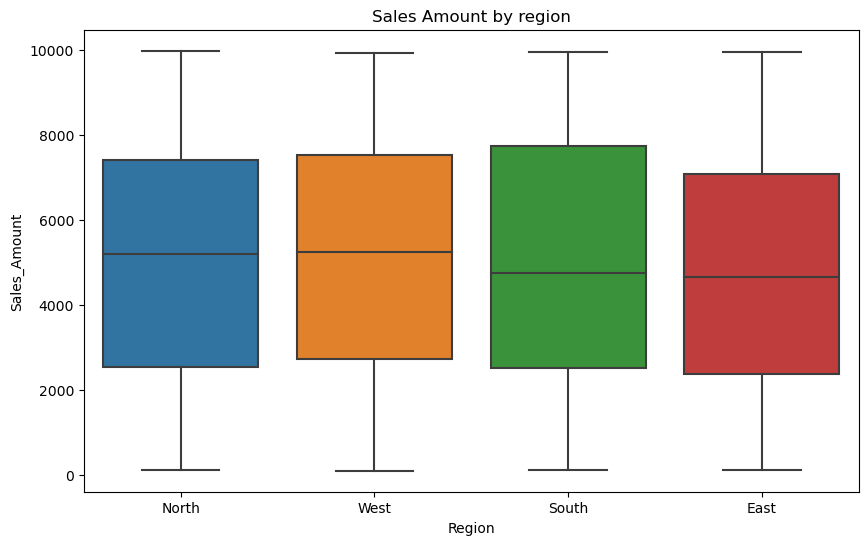

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Region',y='Sales_Amount',data=df,dodge=True)
plt.xlabel('Region')
plt.ylabel('Sales_Amount')
plt.title('Sales Amount by region')
plt.show()

In [25]:
product_revenue=df.groupby('Product_Category')['Sales_Amount'].sum()
print(product_revenue)
highest_revenue_category=product_revenue.idxmax()
print(f' the product category with highest revenue is:{highest_revenue_category}')

Product_Category
Clothing       1313474.36
Electronics    1243499.64
Food           1201773.54
Furniture      1260517.69
Name: Sales_Amount, dtype: float64
 the product category with highest revenue is:Clothing


Product_Category
Food           5317.582035
Electronics    5054.876585
Clothing       4901.023731
Furniture      4848.144962
Name: Sales_Amount, dtype: float64


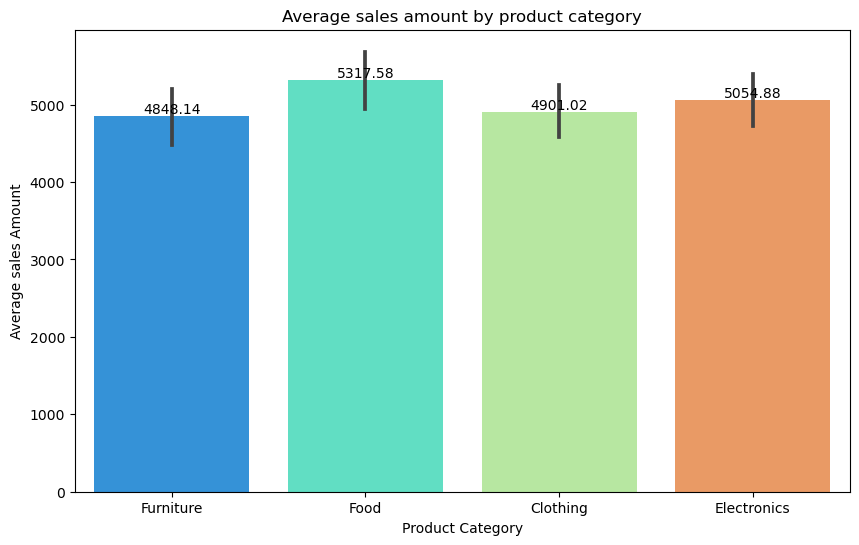

In [29]:
avg_sales_amount_by_cat=df.groupby('Product_Category')['Sales_Amount'].mean()
print(avg_sales_amount_by_cat.sort_values(ascending=False))

plt.figure(figsize=(10,6))
dx=sns.barplot(data=df,x='Product_Category',y='Sales_Amount',palette='rainbow')
for bars in dx.containers:
    dx.bar_label(bars)
plt.xlabel('Product Category')
plt.ylabel('Average sales Amount')
plt.title('Average sales amount by product category')
plt.show()

In [32]:
top_sales_reps =df.groupby('Sales_Rep')['Sales_Amount'].sum().sort_values(ascending=False)
top_sales_reps

Sales_Rep
David      1141737.36
Bob        1080990.63
Eve         970183.99
Alice       965541.77
Charlie     860811.48
Name: Sales_Amount, dtype: float64

In [37]:
sales_by_rep_region=df.groupby(['Region','Sales_Rep'])['Sales_Amount'].sum().reset_index()
sales_by_rep_region_sorted=sales_by_rep_region.sort_values(by=['Region','Sales_Amount'],ascending=[True,False])

print(sales_by_rep_region_sorted)

   Region Sales_Rep  Sales_Amount
1    East       Bob     309876.11
3    East     David     284613.51
0    East     Alice     260789.47
4    East       Eve     239340.90
2    East   Charlie     165172.94
9   North       Eve     304172.20
7   North   Charlie     299789.01
8   North     David     282539.27
5   North     Alice     249647.22
6   North       Bob     233464.81
13  South     David     311416.99
11  South       Bob     251200.43
10  South     Alice     239414.54
14  South       Eve     196078.22
12  South   Charlie     156140.68
16   West       Bob     286449.28
18   West     David     263167.59
17   West   Charlie     239708.85
19   West       Eve     230592.67
15   West     Alice     215690.54


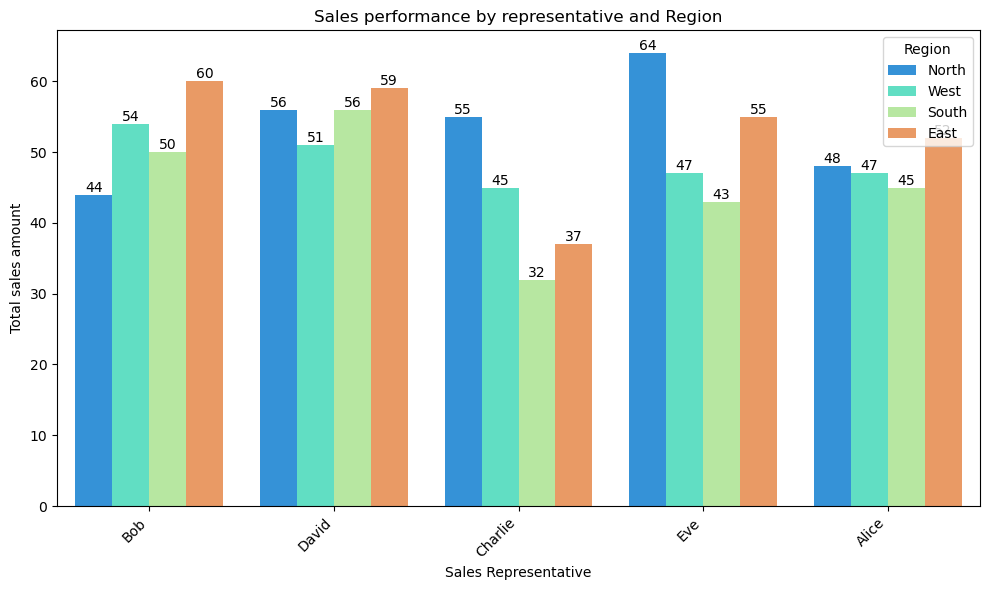

In [39]:
plt.figure(figsize=(10,6))
ex=sns.countplot(data=df,x='Sales_Rep',hue='Region',palette='rainbow')
for bars in ex.containers:
    ex.bar_label(bars)
plt.xlabel('Sales Representative')
plt.ylabel('Total sales amount')
plt.title('Sales performance by representative and Region')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()


Customer_Type
New          2506258.30
Returning    2513006.93
Name: Sales_Amount, dtype: float64


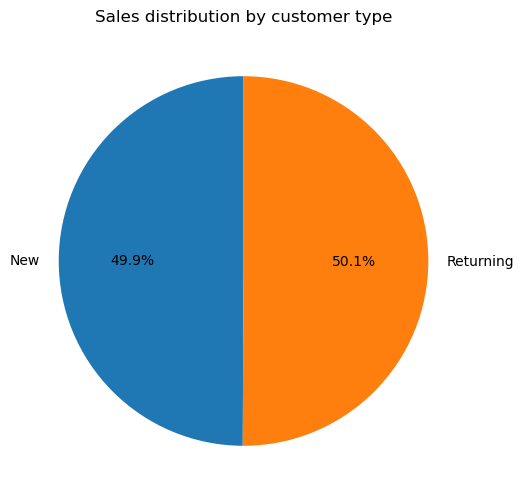

In [41]:
customer_sales=df.groupby('Customer_Type')['Sales_Amount'].sum()
print(customer_sales)

plt.figure(figsize=(10,6))
plt.pie(customer_sales,labels=customer_sales.index,autopct='%1.1f%%', startangle=90)
plt.title('Sales distribution by customer type')
plt.show()


In [42]:
payment_method_counts=df['Payment_Method'].value_counts()
most_popular_payment=payment_method_counts.index[0]
print(f'the most popular payment method is:{most_popular_payment} ')

the most popular payment method is:Credit Card 


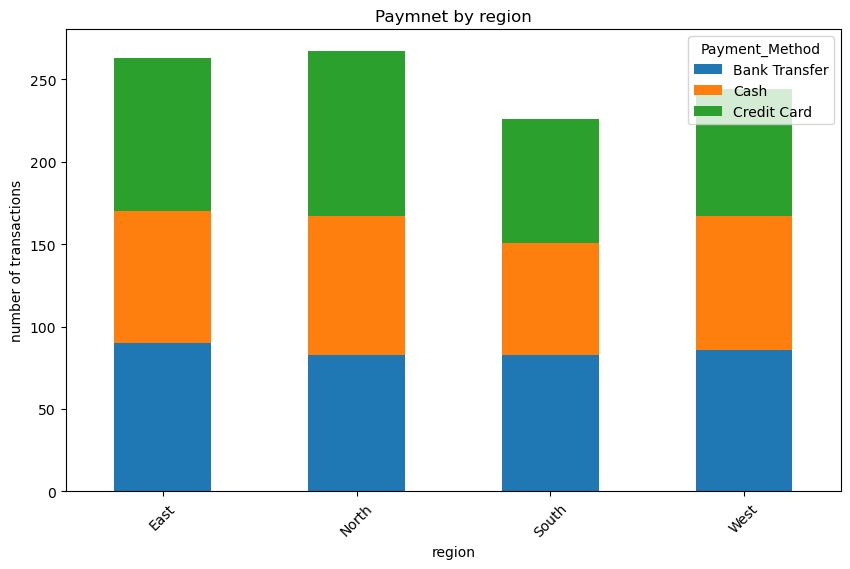

In [44]:
payment_by_region=df.groupby(['Region','Payment_Method'])['Sales_Amount'].count().unstack()
payment_by_region.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Paymnet by region')
plt.xlabel('region')
plt.ylabel('number of transactions')
plt.xticks(rotation=45)
plt.show()

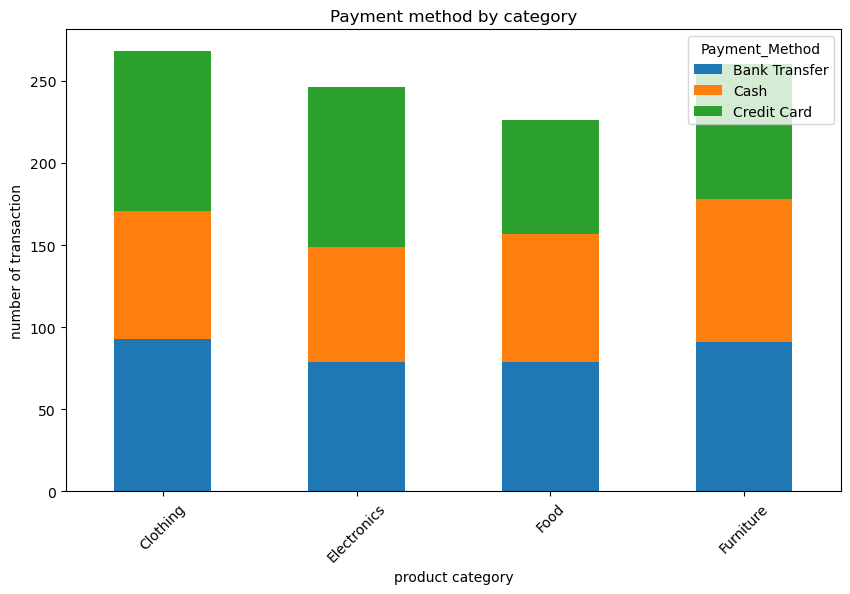

In [46]:
payment_by_product=df.groupby(['Product_Category','Payment_Method'])['Sales_Amount'].count().unstack()
payment_by_product.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Payment method by category')
plt.xlabel('product category')
plt.ylabel('number of transaction')
plt.xticks(rotation=45)
plt.show()


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

daily_sales=df.groupby('Order_date')['Sales_Amount'].sum().reset_index()

daily_sales['Year']=daily_sales['Order_date'].dt.year
daily_sales['Month']=daily_sales['Order_date'].dt.month
daily_sales['Day']=daily_sales['Order_date'].dt.day
daily_sales['Day_of_week']=daily_sales['Order_date'].dt.dayofweek
daily_sales['Day_of_Year']=daily_sales['Order_date'].dt.day_of_year

x=daily_sales[['Year','Month','Day','Day_of_week','Day_of_Year']]
y=daily_sales['Sales_Amount']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=RandomForestRegressor(n_estimators=100,random_state=20)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)



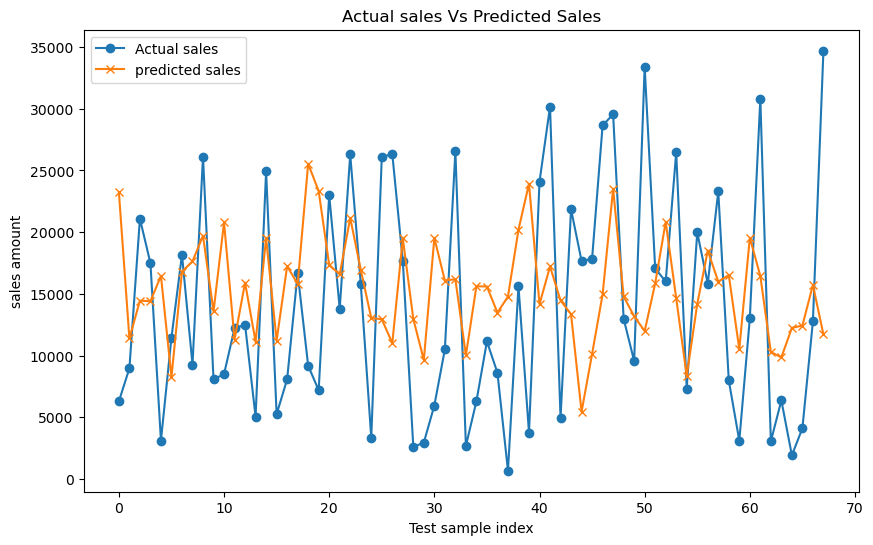

In [52]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values,label='Actual sales',marker='o')
plt.plot(y_pred,label='predicted sales',marker='x')
plt.xlabel('Test sample index')
plt.ylabel('sales amount')
plt.title('Actual sales Vs Predicted Sales')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'prophet'